Python Notebook is used because it is easier to visualize plots/graphs and write down findings.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'output/dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                256 non-null    object 
 1   sentiment_polarity  256 non-null    float64
 2   date                256 non-null    object 
 3   closing_price       256 non-null    float64
 4   open_price          255 non-null    float64
 5   daily_high          256 non-null    float64
 6   daily_low           256 non-null    float64
 7   past_change         256 non-null    float64
 8   future_change       256 non-null    float64
 9   day                 256 non-null    int64  
 10  month               256 non-null    int64  
 11  weekday             256 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 24.1+ KB


In [4]:
df['day'] = df.day.astype('category')
df['month'] = df.month.astype('category')
df['weekday'] = df.weekday.astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                256 non-null    object  
 1   sentiment_polarity  256 non-null    float64 
 2   date                256 non-null    object  
 3   closing_price       256 non-null    float64 
 4   open_price          255 non-null    float64 
 5   daily_high          256 non-null    float64 
 6   daily_low           256 non-null    float64 
 7   past_change         256 non-null    float64 
 8   future_change       256 non-null    float64 
 9   day                 256 non-null    category
 10  month               256 non-null    category
 11  weekday             256 non-null    category
dtypes: category(3), float64(7), object(2)
memory usage: 21.0+ KB


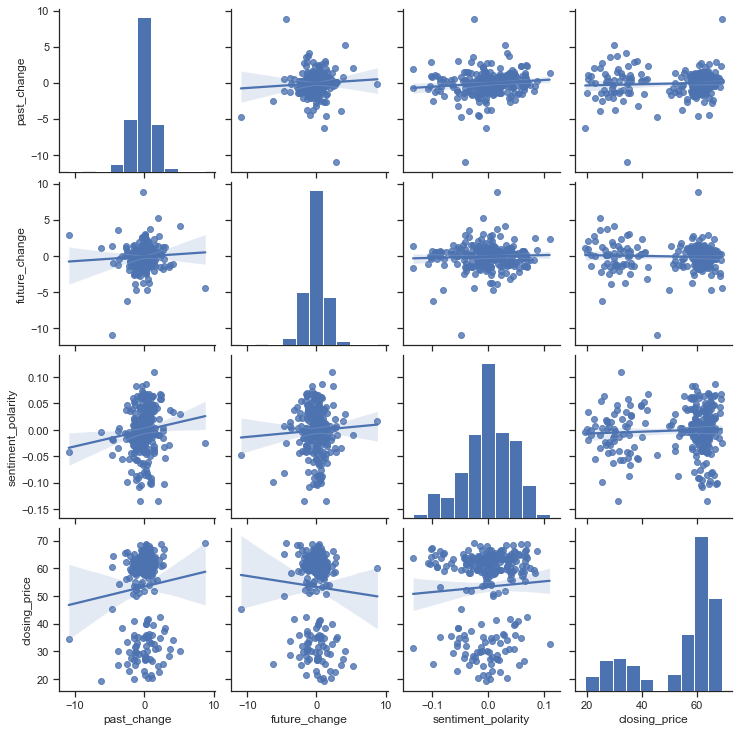

In [6]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[['past_change','future_change','sentiment_polarity','closing_price']], kind="reg")

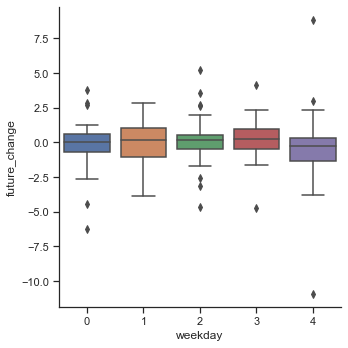

In [7]:
sns.catplot(x="weekday", y="future_change", kind="box", data=df);

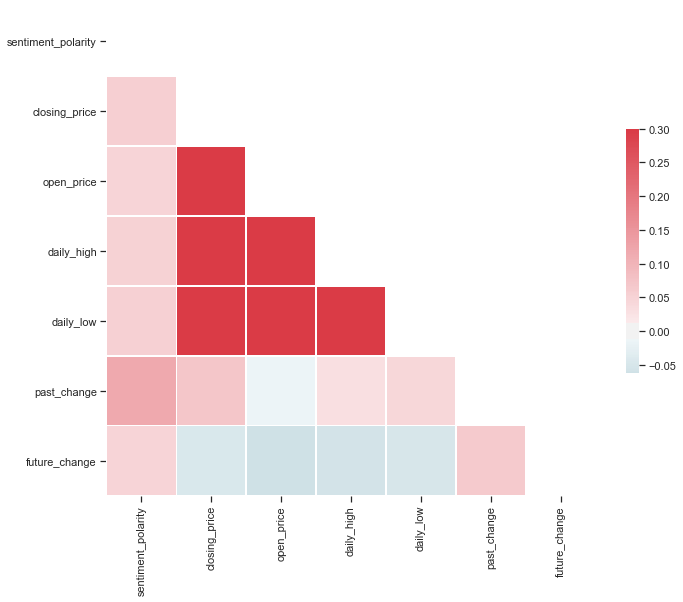

In [8]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})